In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# loading encoded data and  naming it as data1

data_loaded = pd.read_csv("./encoded_data.csv")
data_loaded

,Unnamed: 0,Age,Gender,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,...,EmpJobRole_Research Director,EmpJobRole_Research Scientist,EmpJobRole_Sales Executive,EmpJobRole_Sales Representative,EmpJobRole_Senior Developer,EmpJobRole_Senior Manager R&D,EmpJobRole_Technical Architect,EmpJobRole_Technical Lead,BusinessTravelFrequency_Travel_Frequently,BusinessTravelFrequency_Travel_Rarely
0,0,32,True,10,3,4,55,3,2,4,...,False,False,True,False,False,False,False,False,False,True
1,1,47,True,14,4,4,42,3,2,1,...,False,False,True,False,False,False,False,False,False,True
2,2,40,True,5,4,4,48,2,3,1,...,False,False,True,False,False,False,False,False,True,False
3,3,41,True,10,4,2,73,2,5,4,...,False,False,False,False,False,False,False,False,False,True
4,4,60,True,16,4,1,84,3,2,1,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1195,27,False,3,1,4,71,4,2,4,...,False,False,True,False,False,False,False,False,True,False
1196,1196,37,True,10,2,4,80,4,1,4,...,False,False,False,False,True,False,False,False,False,True
1197,1197,50,True,28,1,4,74,4,1,3,...,False,False,False,False,True,False,False,False,False,True
1198,1198,34,False,9,3,4,46,2,3,2,...,False,False,False,False,False,False,False,False,False,True


In [5]:
# fetching only continuous columns
# considering the previous assumption made in data exploratory part such that features with >=20 unique values are taken as continuous features
for column in data_loaded.columns:
    if data_loaded[column].nunique() >= 20:
        print(f'{column}: {data_loaded[column].nunique()}')
        print("--------------------------------")          

Unnamed: 0: 1200
--------------------------------
Age: 43
--------------------------------
DistanceFromHome: 29
--------------------------------
EmpHourlyRate: 71
--------------------------------
TotalWorkExperienceInYears: 40
--------------------------------
ExperienceYearsAtThisCompany: 37
--------------------------------


In [6]:
continuous_columns= data_loaded[['Age', 'DistanceFromHome', 'EmpHourlyRate', 'TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany']]

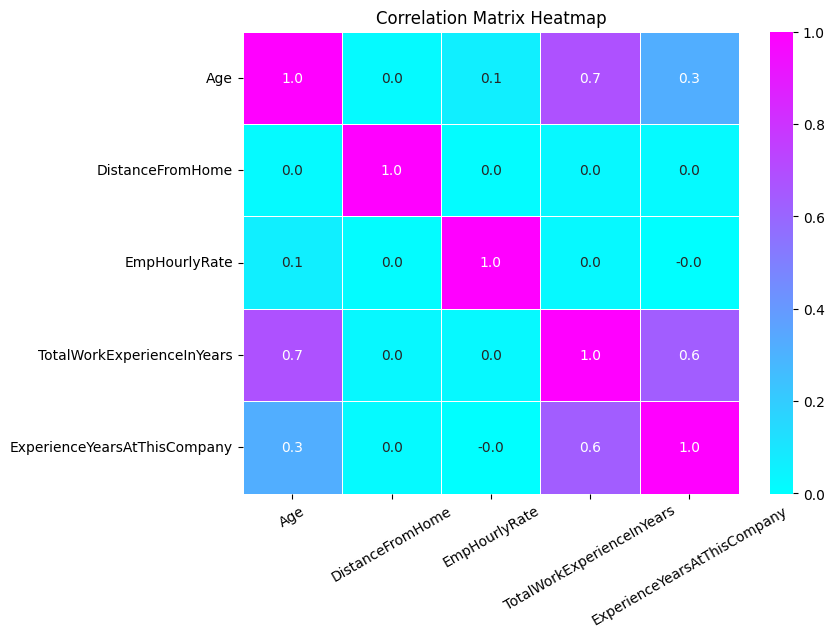

In [7]:
correlation_matrix = continuous_columns.corr()

# Creating a heatmap
plt.figure(figsize=(8, 6))
h= sns.heatmap(correlation_matrix, annot=True, cmap="cool", fmt=".1f", linewidths=0.5)
h.set_xticklabels(h.get_xticklabels(), rotation= 30)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [8]:
numerical_columns = []

for column in data_loaded:
    if data_loaded[column].dtype != 'object':
        numerical_columns.append(column)

In [9]:
numerical_columns = [feature for feature in numerical_columns if feature != 'Unnamed: 0']
numerical_columns

['Age',
 'Gender',
 'DistanceFromHome',
 'EmpEducationLevel',
 'EmpEnvironmentSatisfaction',
 'EmpHourlyRate',
 'EmpJobInvolvement',
 'EmpJobLevel',
 'EmpJobSatisfaction',
 'NumCompaniesWorked',
 'OverTime',
 'EmpLastSalaryHikePercent',
 'EmpRelationshipSatisfaction',
 'TotalWorkExperienceInYears',
 'TrainingTimesLastYear',
 'EmpWorkLifeBalance',
 'ExperienceYearsAtThisCompany',
 'ExperienceYearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'Attrition',
 'PerformanceRating',
 'EducationBackground_Life Sciences',
 'EducationBackground_Marketing',
 'EducationBackground_Medical',
 'EducationBackground_Other',
 'EducationBackground_Technical Degree',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'EmpDepartment_Development',
 'EmpDepartment_Finance',
 'EmpDepartment_Human Resources',
 'EmpDepartment_Research & Development',
 'EmpDepartment_Sales',
 'EmpJobRole_Data Scientist',
 'EmpJobRole_Delivery Manager',
 'EmpJobRole_Developer',
 'EmpJobRole_Finance Manager

In [10]:
X = data_loaded.drop('PerformanceRating', axis=1)
y = data_loaded['PerformanceRating']

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size= 0.2, random_state= 42)

In [12]:
# checking the shape 

print(f'X_train shape: {x_train.shape}\nX_test shape: {x_test.shape}')
print(f'y_train shape: {y_train.shape}\ny_test shape: {y_test.shape}')

X_train shape: (960, 54)
X_test shape: (240, 54)
y_train shape: (960,)
y_test shape: (240,)


In [13]:
# using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scaling= MinMaxScaler()
x_train[['TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany']] = scaling.fit_transform(x_train[['TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany']])
x_test[['TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany']] = scaling.transform(x_test[['TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany']])

In [14]:
x_test.head()

,Unnamed: 0,Age,Gender,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,...,EmpJobRole_Research Director,EmpJobRole_Research Scientist,EmpJobRole_Sales Executive,EmpJobRole_Sales Representative,EmpJobRole_Senior Developer,EmpJobRole_Senior Manager R&D,EmpJobRole_Technical Architect,EmpJobRole_Technical Lead,BusinessTravelFrequency_Travel_Frequently,BusinessTravelFrequency_Travel_Rarely
811,811,35,False,23,4,3,30,3,1,1,...,False,False,False,False,False,False,False,False,False,True
1149,1149,26,True,24,3,3,66,1,1,4,...,False,False,False,False,False,False,False,False,False,True
662,662,36,True,17,2,3,33,2,2,2,...,False,False,True,False,False,False,False,False,False,True
542,542,53,True,24,4,2,48,4,3,4,...,False,False,False,False,False,False,False,False,False,True
858,858,34,False,6,4,3,45,2,2,2,...,False,False,False,False,False,False,False,False,False,True


In [15]:
# coverting y_test into a dataframe and storing test dataset as a separate csv file.
y_test= pd.DataFrame(y_test, columns=['PerformanceRating'])
y_test.head()

,PerformanceRating
811,3
1149,3
662,2
542,2
858,3


In [16]:
# separate csv file for test data
test_data= pd.concat([x_test, y_test], axis= 1)
test_data.head()

,Unnamed: 0,Age,Gender,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,...,EmpJobRole_Research Scientist,EmpJobRole_Sales Executive,EmpJobRole_Sales Representative,EmpJobRole_Senior Developer,EmpJobRole_Senior Manager R&D,EmpJobRole_Technical Architect,EmpJobRole_Technical Lead,BusinessTravelFrequency_Travel_Frequently,BusinessTravelFrequency_Travel_Rarely,PerformanceRating
811,811,35,False,23,4,3,30,3,1,1,...,False,False,False,False,False,False,False,False,True,3
1149,1149,26,True,24,3,3,66,1,1,4,...,False,False,False,False,False,False,False,False,True,3
662,662,36,True,17,2,3,33,2,2,2,...,False,True,False,False,False,False,False,False,True,2
542,542,53,True,24,4,2,48,4,3,4,...,False,False,False,False,False,False,False,False,True,2
858,858,34,False,6,4,3,45,2,2,2,...,False,False,False,False,False,False,False,False,True,3


In [17]:
test_data.to_csv("testing_data.csv", index= False)

In [18]:
# importing SMOTE--> oversampling technique
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_sm, y_train_sm= smote.fit_resample(x_train, y_train)

In [19]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_train_sm))

Counter({3: 699, 2: 155, 4: 106})
Counter({3: 699, 2: 699, 4: 699})


In [20]:
# storing processed data as a separate file for training models
processed_data= pd.concat([X_train_sm, y_train_sm], axis= 1)
processed_data.head()

,Unnamed: 0,Age,Gender,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,...,EmpJobRole_Research Scientist,EmpJobRole_Sales Executive,EmpJobRole_Sales Representative,EmpJobRole_Senior Developer,EmpJobRole_Senior Manager R&D,EmpJobRole_Technical Architect,EmpJobRole_Technical Lead,BusinessTravelFrequency_Travel_Frequently,BusinessTravelFrequency_Travel_Rarely,PerformanceRating
0,437,28,True,7,3,3,55,3,2,1,...,False,True,False,False,False,False,False,True,False,3
1,1091,25,False,4,2,2,99,2,2,4,...,False,True,False,False,False,False,False,False,True,2
2,327,25,False,1,3,4,40,3,1,2,...,True,False,False,False,False,False,False,False,True,3
3,576,31,True,5,3,1,51,3,2,3,...,False,True,False,False,False,False,False,False,True,4
4,1078,30,True,2,1,3,72,3,1,2,...,False,False,True,False,False,False,False,False,True,3


In [21]:
processed_data.to_csv("processed_data.csv", index= False) # contains only training data for model

### Decision Tree Model

In [22]:
# Training the decision tree model

# importing the model
from sklearn.tree import DecisionTreeClassifier

# Initializing the model
dt_model= DecisionTreeClassifier()

# fitting the model to the train data
dt_model.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier()

In [23]:
# prediction

y_pred_dt= dt_model.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [25]:
# model evaluation

# Checking Accuracy score
dt_accuracy_score = accuracy_score(y_test, y_pred_dt)
print(f'Model accuracy score: {dt_accuracy_score}')

Model accuracy score: 0.9083333333333333


In [26]:
# Checking for overfitting and underfitting

Training_accuracy= dt_model.score(X_train_sm, y_train_sm)
Testing_accuracy= dt_model.score(x_test, y_test)
print(f'Training set score: {Training_accuracy}')
print(f'Testing set score: {Testing_accuracy}')

Training set score: 1.0
Testing set score: 0.9083333333333333


In [27]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

In [28]:
# K-Fold Cross-validation

kf_for_dt_model = KFold(n_splits= 10, shuffle= False)

In [29]:
# cross validation accuracy

score = cross_val_score(dt_model, X, y, cv=kf_for_dt_model, scoring='accuracy')
print(f'Cross validation accuracy scores: {score}')

Cross validation accuracy scores: [0.775      0.86666667 0.94166667 0.925      0.94166667 0.925
 0.875      0.85       0.88333333 0.825     ]


In [30]:
DT_acc= pd.DataFrame({'CV mean': score.mean(), 'Std': score.std()}, index= ['Cross validation accuracy'])
DT_acc

,CV mean,Std
Cross validation accuracy,0.880833,0.051781


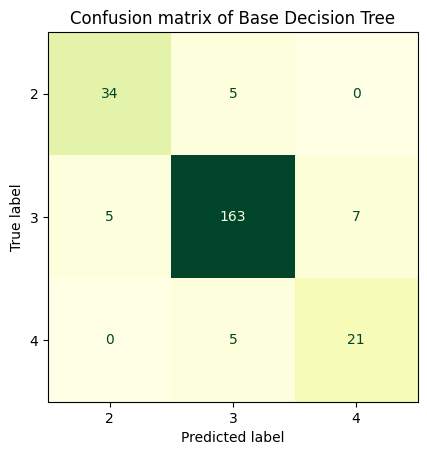

In [31]:
# Confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(dt_model, x_test, y_test, colorbar=False, cmap='YlGn')
plt.title('Confusion matrix of Base Decision Tree')
plt.grid(False)

In [32]:
# classification report

print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           2       0.87      0.87      0.87        39
           3       0.94      0.93      0.94       175
           4       0.75      0.81      0.78        26

    accuracy                           0.91       240
   macro avg       0.85      0.87      0.86       240
weighted avg       0.91      0.91      0.91       240



In [33]:
# saving tuned Decission Tree model as pkl file

import joblib
joblib.dump(dt_model,"decission_tree_base_model.pkl")

['decission_tree_base_model.pkl']

In [34]:
# Performance metrics

'''Defining a function to calculate all the required performance metrics
for the given model'''
def metrics_calculator(y_test, y_pred, model_name):
    result=pd.DataFrame(
        data=[
            accuracy_score(y_test, y_pred),
            precision_score(y_test, y_pred, average= 'macro'),
            recall_score(y_test, y_pred, average= 'macro'),
            f1_score(y_test, y_pred, average= 'macro')
        ],
        index=['Accuracy','precision','Recall', 'F1-score'],
        columns= [model_name]
    )
    return result

In [35]:
Base_dt_result= metrics_calculator(y_test, y_pred_dt, 'Base Decision Tree')
Base_dt_result.style.background_gradient(cmap='YlGn')

,Base Decision Tree
Accuracy,0.908333
precision,0.854664
Recall,0.870305
F1-score,0.862118


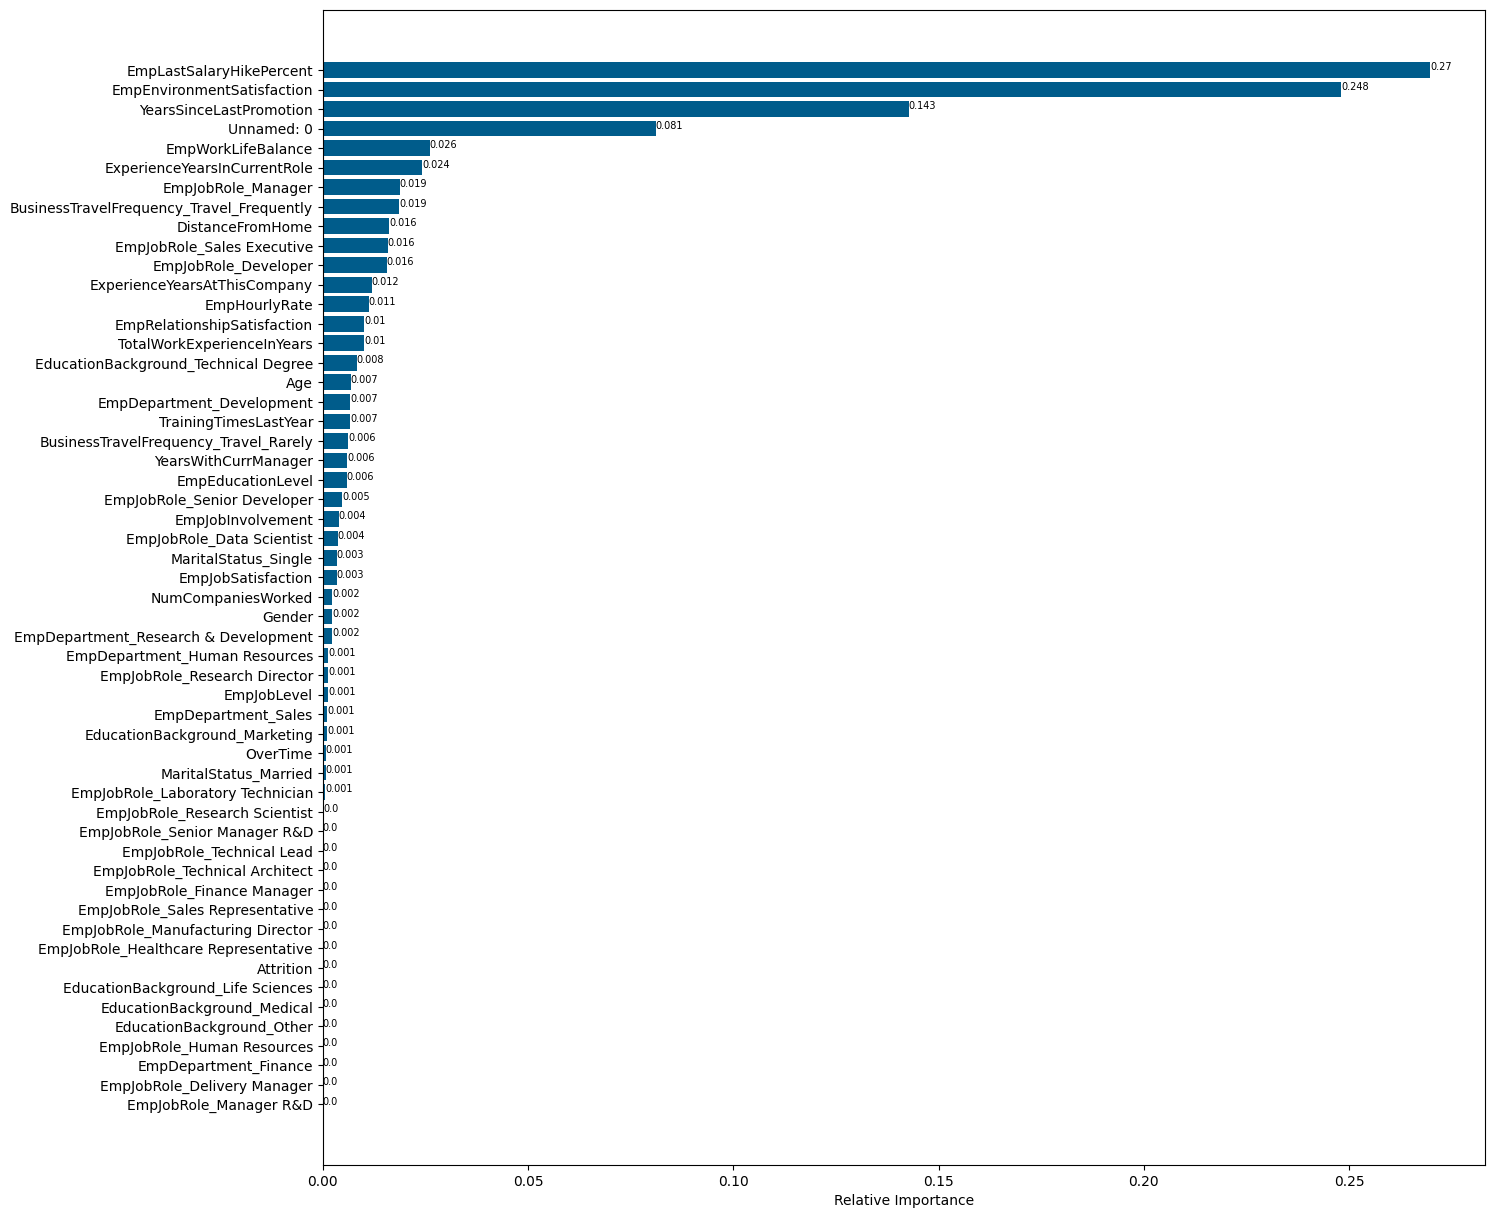

In [43]:
# feature importance

#getting feature importances from the decision tree model
importances= dt_model.feature_importances_
feature_names= X.columns

# sort the features by importance
indices= np.argsort(importances)

# Create a horizontal bar plot of the feature importances
plt.figure(figsize= (15, 15))
plt.barh(range(len(indices)), importances[indices], color= '#005c8b', align= 'center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')

# Add labels to the bars
for i, v in enumerate(importances[indices]):
  plt.text(v, i, str(round(v, 3)), color= 'black', fontsize= 7)

plt.show()

Tunning for decision tree

In [44]:
# Define the parameter grid
from sklearn.model_selection import GridSearchCV


param_grid = {
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [20, 30, 40],
    'min_samples_leaf': [10, 20, 30, 40],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

grid_search.fit(X_train_sm, y_train_sm)
best_params = grid_search.best_params_

print(f'Best parameters: {best_params}')

Best parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 20}


In [45]:
model_dt_after_tuning = DecisionTreeClassifier(criterion=best_params['criterion'], max_depth=best_params['max_depth'], min_samples_leaf=best_params['min_samples_split'], min_samples_split=best_params['min_samples_split'])
model_dt_after_tuning.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=20)

In [46]:
y_prediction_after_dt_tuning = model_dt_after_tuning.predict(x_test)
y_prediction_after_dt_tuning

array([3, 2, 2, 2, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 2, 3, 4, 4, 3, 2, 3, 3, 4, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3,
       3, 4, 4, 3, 3, 3, 3, 2, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3,
       2, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2, 2, 3,
       3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 2, 2, 3, 3, 4, 3, 3, 3, 2, 2, 2, 2,
       3, 3, 4, 3, 3, 4, 4, 2, 3, 3, 3, 4, 2, 2, 3, 2, 2, 3, 4, 4, 3, 3,
       3, 4, 3, 2, 3, 3, 3, 4, 3, 2, 2, 2, 2, 3, 3, 2, 3, 4, 3, 3, 3, 3,
       3, 4, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 4, 2, 3, 2, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 2, 3, 2, 2, 2, 3, 3, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3,
       4, 3, 2, 4, 3, 3, 4, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 2],
      dtype=int64)

In [47]:
accuracy_score_after_dt_tunning = accuracy_score(y_test, y_prediction_after_dt_tuning)
print(f'Accuracy after Hyper parameter tunning: {accuracy_score_after_dt_tunning * 100}%')

Accuracy after Hyper parameter tunning: 85.83333333333333%


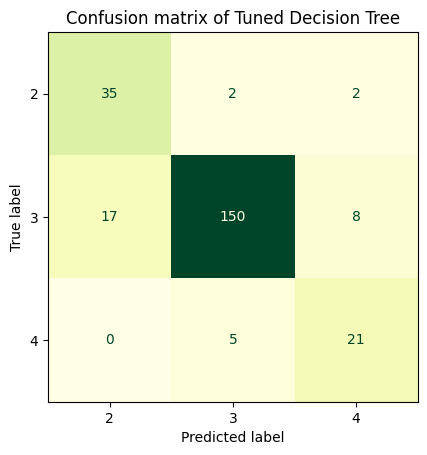

In [48]:
# Tuned model confusion matrix

ConfusionMatrixDisplay.from_estimator(model_dt_after_tuning, x_test, y_test, colorbar= False, cmap= 'YlGn')
plt.title('Confusion matrix of Tuned Decision Tree')
plt.grid(False)

In [49]:
print(classification_report(y_test, y_prediction_after_dt_tuning))

              precision    recall  f1-score   support

           2       0.67      0.90      0.77        39
           3       0.96      0.86      0.90       175
           4       0.68      0.81      0.74        26

    accuracy                           0.86       240
   macro avg       0.77      0.85      0.80       240
weighted avg       0.88      0.86      0.86       240



In [50]:
# saving tuned Decission Tree model after tunning as pkl file

import joblib
joblib.dump(model_dt_after_tuning,"decission_tree_trained_and_tunned_model.pkl")

['decission_tree_trained_and_tunned_model.pkl']

In [51]:
DT_Model_after_tuning = metrics_calculator(y_test, y_prediction_after_dt_tuning, 'Decision Tree After Tunning')
DT_Model_after_tuning

,Decision Tree After Tunning
Accuracy,0.858333
precision,0.768637
Recall,0.854090
F1-score,0.803229


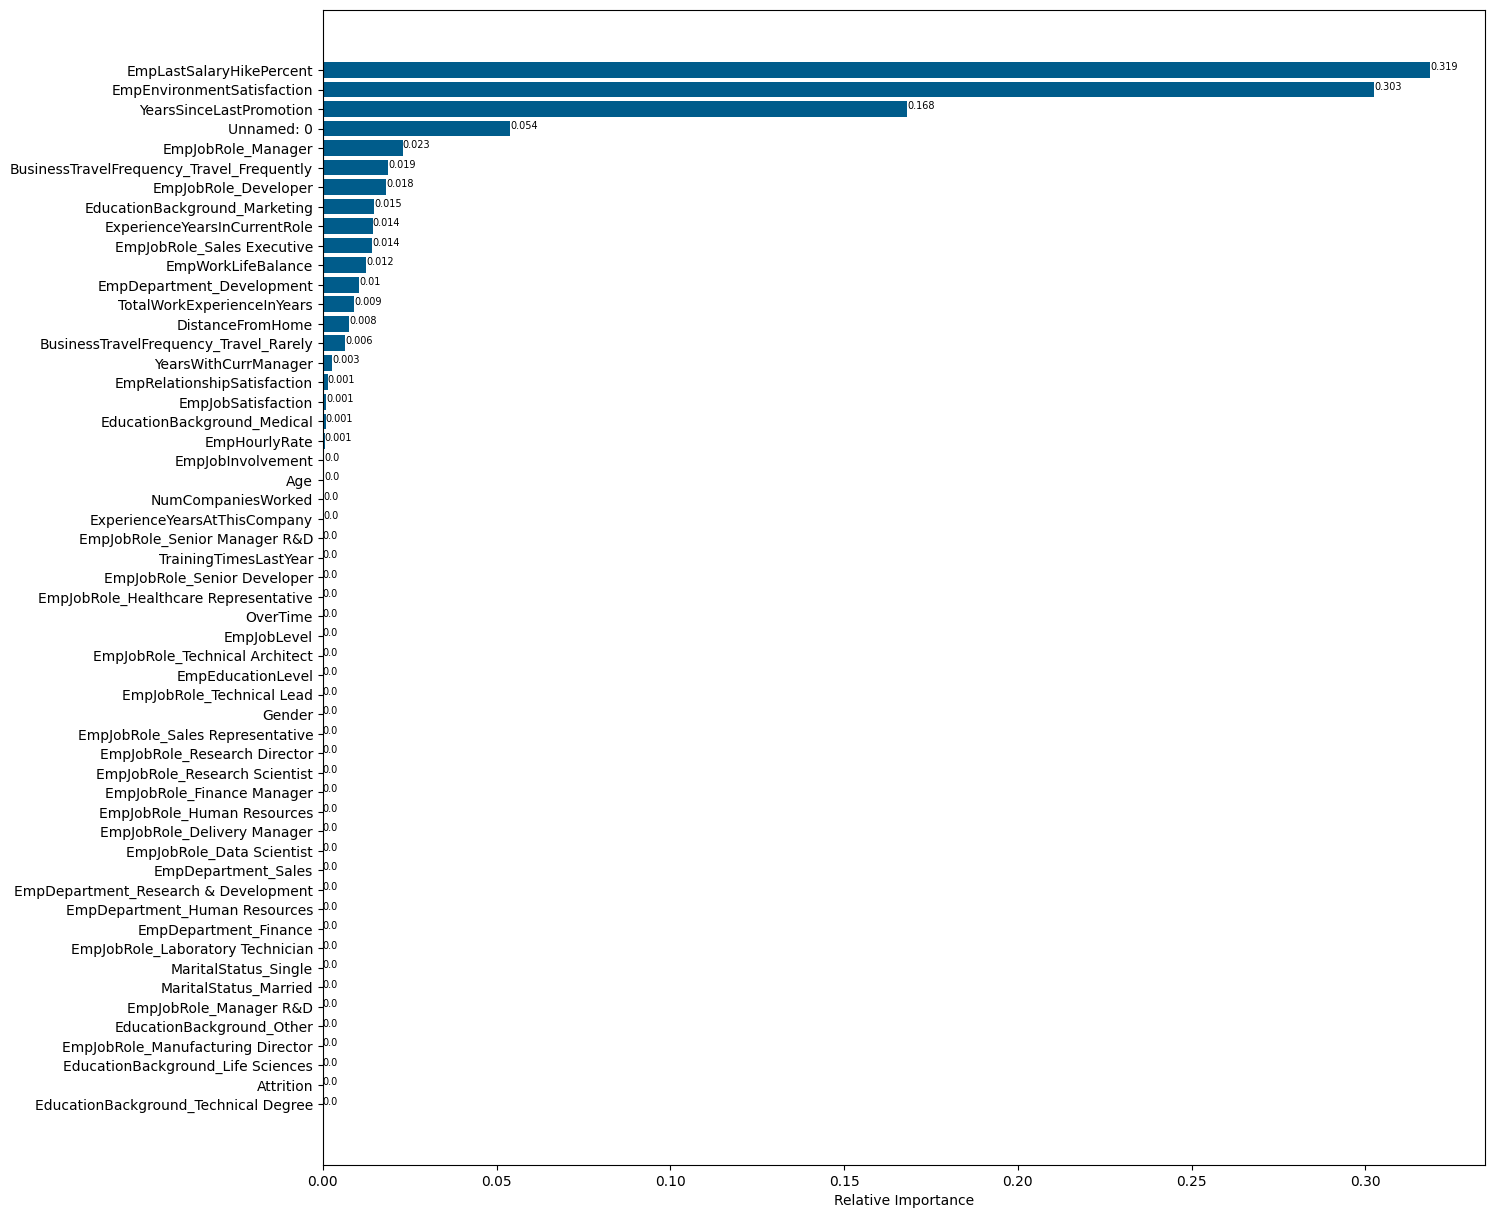

In [52]:
# tuned model feature importance

#getting feature importances from the tuned decision tree model
importances = model_dt_after_tuning.feature_importances_
feature_names = X.columns

# sort the features by importance
indices= np.argsort(importances)

# Creating a horizontal bar plot of the feature importances
plt.figure(figsize = (15, 15))
plt.barh(range(len(indices)), importances[indices], color= '#005c8b', align= 'center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')

# Adding labels to the bars
for i, v in enumerate(importances[indices]):
  plt.text(v, i, str(round(v, 3)), color= 'black', fontsize= 7)

plt.show()

Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
random_classifier = RandomForestClassifier()
random_classifier.fit(X_train_sm, y_train_sm)

RandomForestClassifier()

In [55]:
y_random_prediction = random_classifier.predict(x_test)

In [56]:
random_classifier_accuracy = accuracy_score(y_test, y_random_prediction)
print(f'Accuracy after Random Forest is {random_classifier_accuracy * 100}%')

Accuracy after Random Forest is 92.91666666666667%


In [57]:
confusion_matrix(y_test, y_random_prediction)

array([[ 32,   7,   0],
       [  2, 171,   2],
       [  0,   6,  20]], dtype=int64)

In [58]:
print(classification_report(y_test, y_random_prediction))

              precision    recall  f1-score   support

           2       0.94      0.82      0.88        39
           3       0.93      0.98      0.95       175
           4       0.91      0.77      0.83        26

    accuracy                           0.93       240
   macro avg       0.93      0.86      0.89       240
weighted avg       0.93      0.93      0.93       240



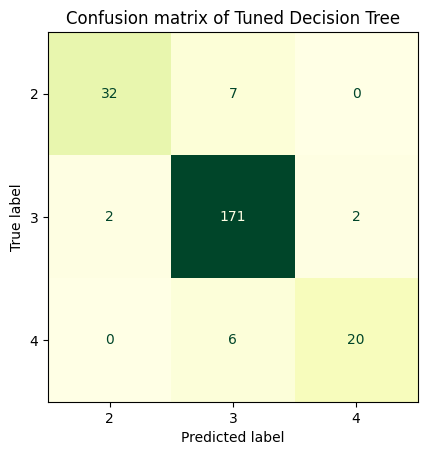

In [59]:
ConfusionMatrixDisplay.from_estimator(random_classifier, x_test, y_test, colorbar= False, cmap= 'YlGn')
plt.title('Confusion matrix of Tuned Decision Tree')
plt.grid(False)

In [60]:
# saving tuned random forest model as pkl file

import joblib
joblib.dump(random_classifier,"random_forest_base_trained_model.pkl")

['random_forest_base_trained_model.pkl']

In [61]:
Base_RCL_result = metrics_calculator(y_test, y_random_prediction, 'Base Random Forest')
Base_RCL_result

,Base Random Forest
Accuracy,0.929167
precision,0.926538
Recall,0.855629
F1-score,0.887564


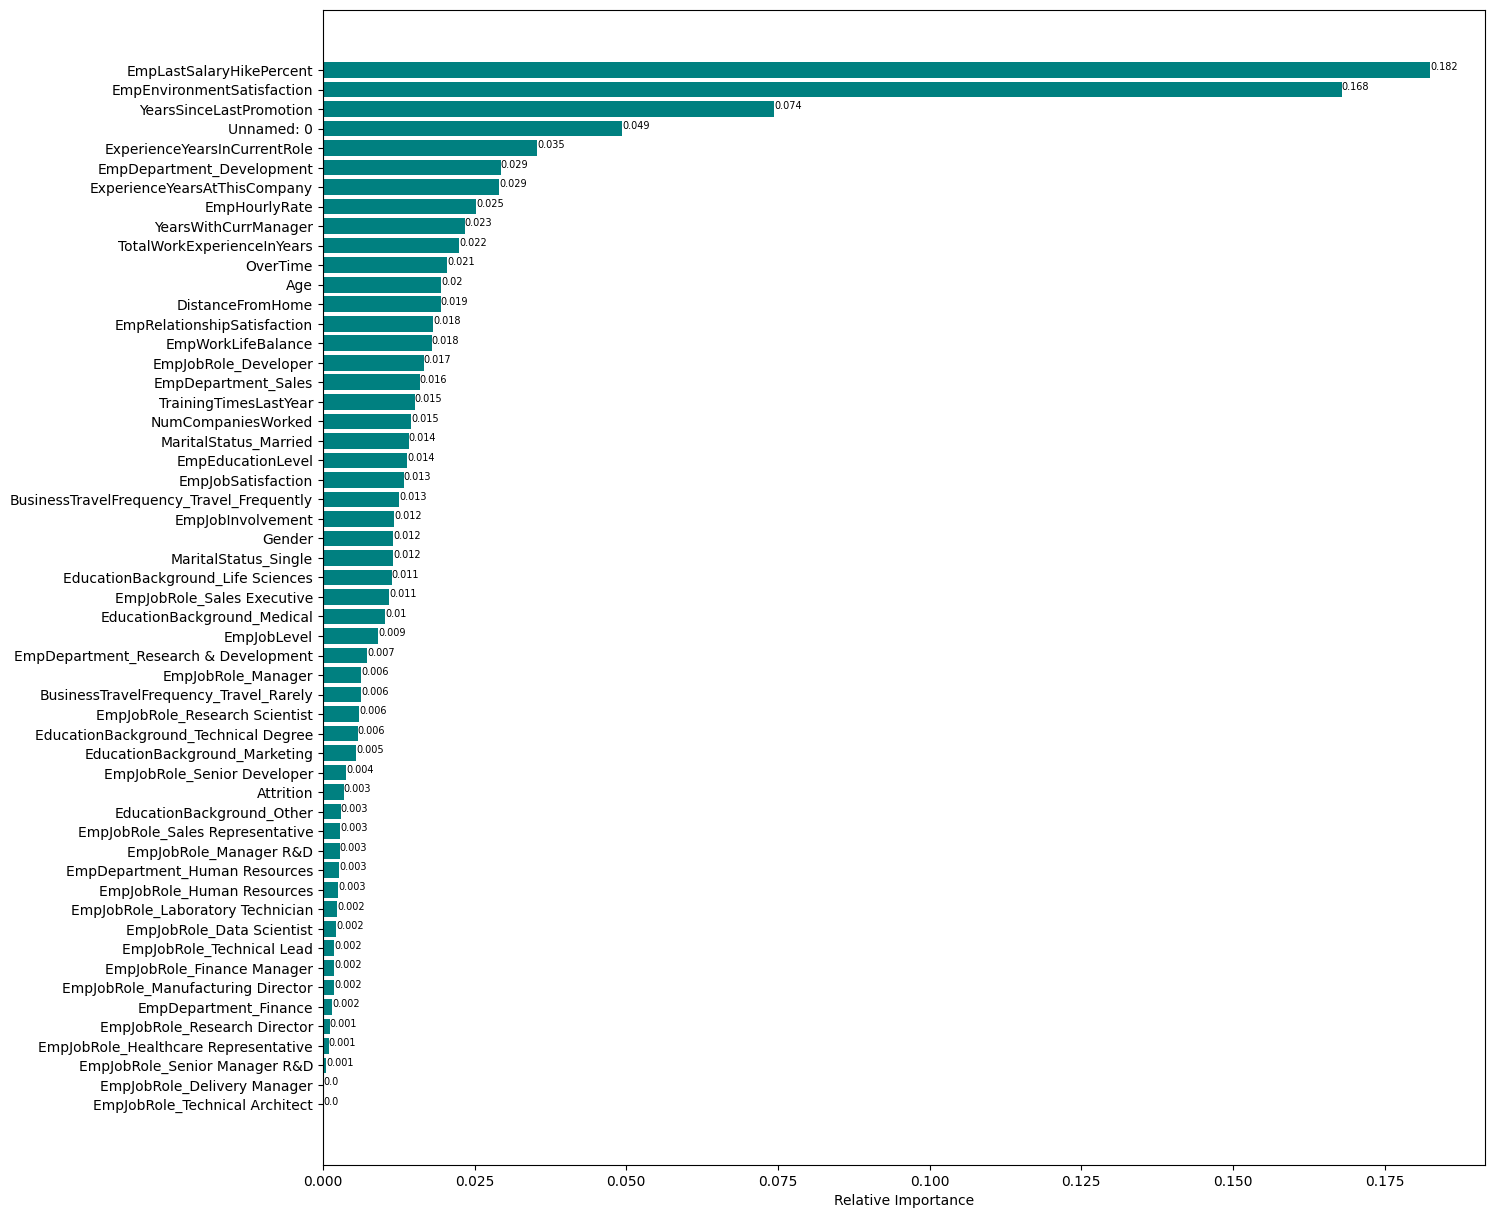

In [62]:
# Random Forest feature importance

#getting feature importances from the random forest model
importances= random_classifier.feature_importances_
feature_names= X.columns

# sort the features by importance
indices= np.argsort(importances)

# Create a horizontal bar plot of the feature importances
plt.figure(figsize= (15, 15))
plt.barh(range(len(indices)), importances[indices], color= 'teal', align= 'center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')

# Add labels to the bars
for i, v in enumerate(importances[indices]):
  plt.text(v, i, str(round(v, 3)), color= 'black', fontsize= 7)

plt.show()

Tunning for Random Forest Classification

In [63]:
# Perform GridSearchCV for Random Forest Model

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
random_classifier_grid_search = GridSearchCV(estimator=random_classifier, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
random_classifier_grid_search.fit(X_train_sm, y_train_sm)

print("Best Parameters:", random_classifier_grid_search.best_params_)

Best Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [64]:
rcl_after_tunning = RandomForestClassifier(bootstrap=random_classifier_grid_search.best_params_['bootstrap'], max_depth=random_classifier_grid_search.best_params_['max_depth'], min_samples_split=random_classifier_grid_search.best_params_['min_samples_split'], max_features=random_classifier_grid_search.best_params_['max_features'], min_samples_leaf=random_classifier_grid_search.best_params_['min_samples_leaf'], n_estimators=random_classifier_grid_search.best_params_['n_estimators'])
rcl_after_tunning.fit(X_train_sm, y_train_sm)

RandomForestClassifier()

In [65]:
y_prediction_after_tuning_rcl = rcl_after_tunning.predict(x_test)
y_prediction_after_tuning_rcl

array([3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3,
       3, 4, 4, 3, 3, 3, 3, 2, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3,
       2, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3,
       3, 3, 3, 2, 4, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 2, 2, 2, 3,
       3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 4, 3, 2, 2, 2, 3, 3, 3, 2, 3, 4, 3, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 2, 3, 2, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3,
       4, 3, 2, 4, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2],
      dtype=int64)

In [66]:
# Accuracy for Random Classifier after Tunning
accuracy_score_after_tunning_rcl = accuracy_score(y_test, y_prediction_after_tuning_rcl)
print(f'Accuracy after Hyper parameter tunning: {accuracy_score_after_tunning_rcl * 100}%')

Accuracy after Hyper parameter tunning: 92.08333333333333%


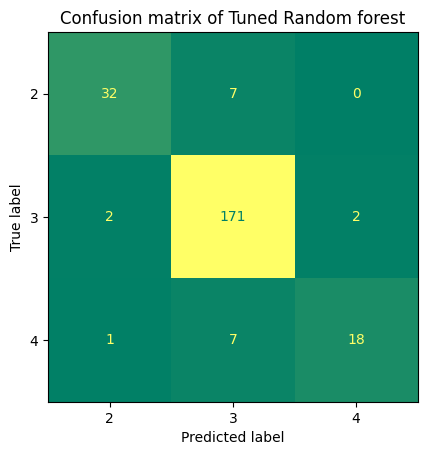

In [67]:
# Tuned model confusion matrix

ConfusionMatrixDisplay.from_estimator(rcl_after_tunning, x_test, y_test, colorbar= False, cmap= 'summer')
plt.title('Confusion matrix of Tuned Random forest')
plt.grid(False)

In [68]:
print(classification_report(y_test, y_prediction_after_tuning_rcl))

              precision    recall  f1-score   support

           2       0.91      0.82      0.86        39
           3       0.92      0.98      0.95       175
           4       0.90      0.69      0.78        26

    accuracy                           0.92       240
   macro avg       0.91      0.83      0.87       240
weighted avg       0.92      0.92      0.92       240



In [69]:
# tuned model performance metrics

tuned_rf_result= metrics_calculator(y_test, y_prediction_after_tuning_rcl, 'Tuned Random Forest')
tuned_rf_result.style.background_gradient(cmap='summer')

,Tuned Random Forest
Accuracy,0.920833
precision,0.912870
Recall,0.829988
F1-score,0.865825


In [70]:
# saving tuned random forest model as pkl file

import joblib
joblib.dump(rcl_after_tunning,"random_forest_trained_and_tunned_model.pkl")

['random_forest_trained_and_tunned_model.pkl']

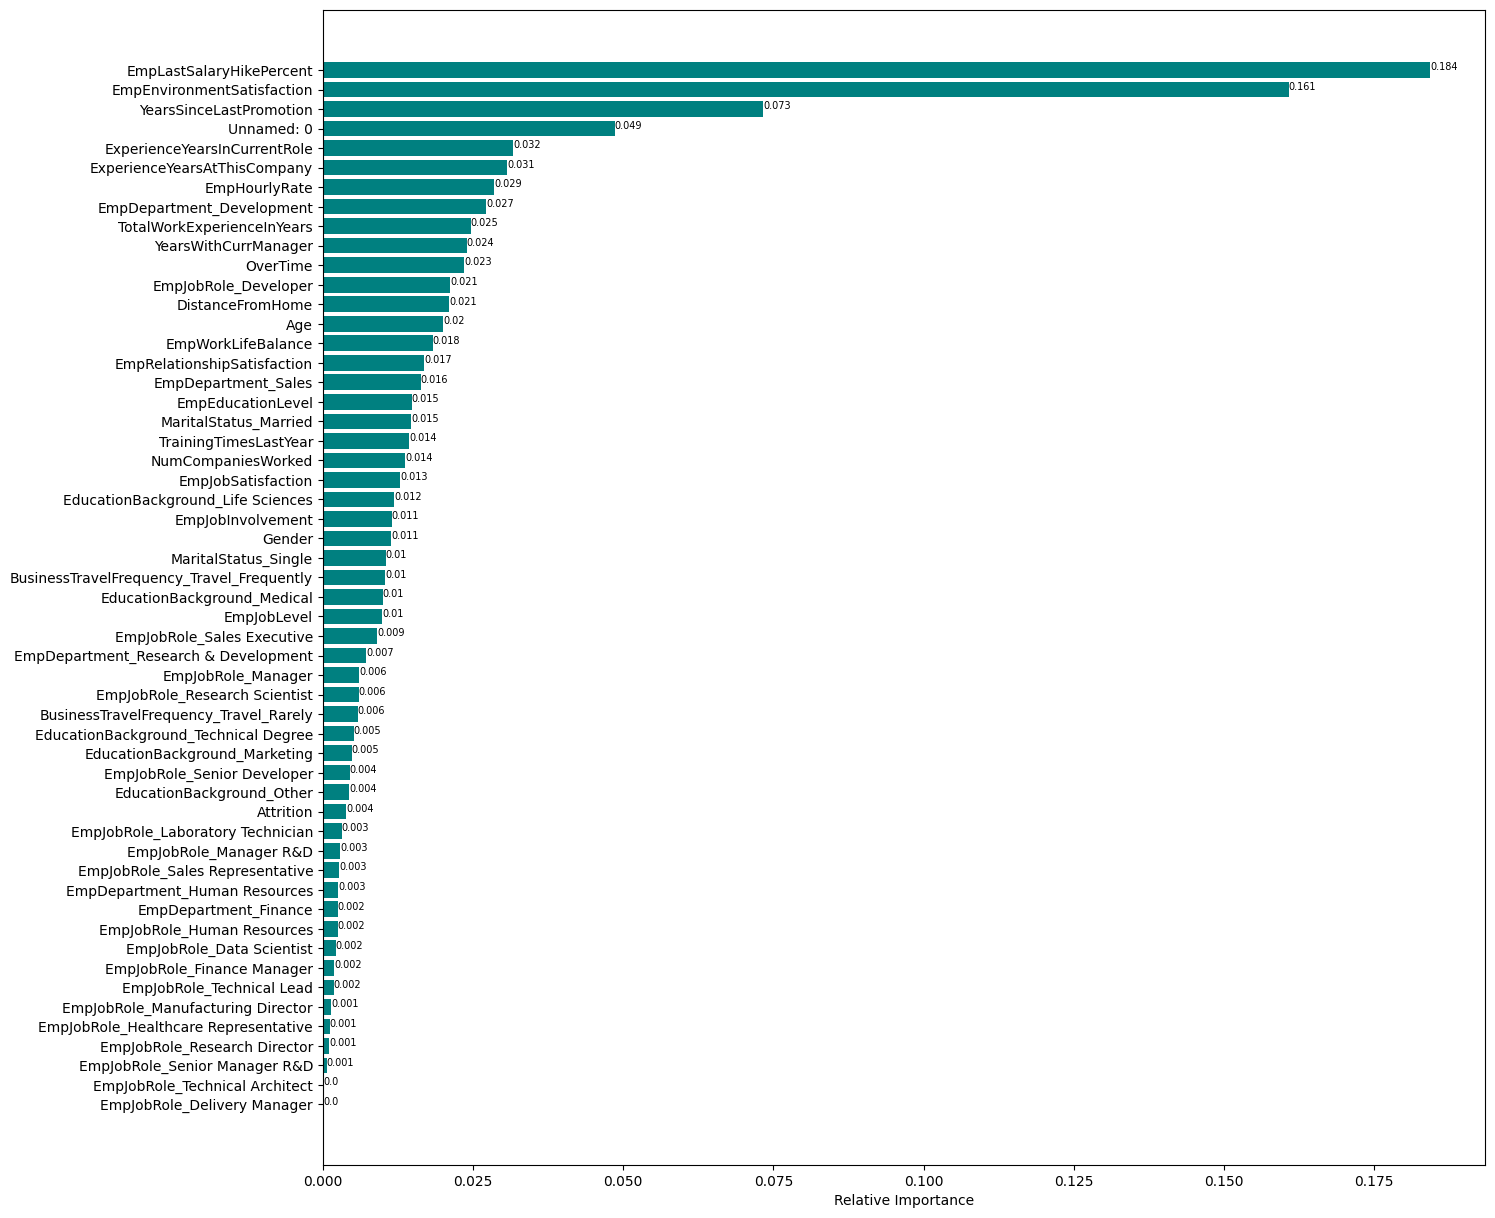

In [71]:
# tuned model feature importance

#getting feature importances from the tuned random forest model
importances= rcl_after_tunning.feature_importances_
feature_names= X.columns

# sort the features by importance
indices= np.argsort(importances)

# Creating a horizontal bar plot of the feature importances
plt.figure(figsize= (15, 15))
plt.barh(range(len(indices)), importances[indices], color= 'teal', align= 'center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')

# Adding labels to the bars
for i, v in enumerate(importances[indices]):
  plt.text(v, i, str(round(v, 3)), color= 'black', fontsize= 7)

plt.show()

SUPPORT VECTOR MACHINE:

In [72]:
# Training the model

# importing the model
from sklearn.svm import SVC

# Initiating the model
svm_model= SVC()

# fitting the model to the training set
svm_model.fit(X_train_sm, y_train_sm)

SVC()

In [73]:
y_pred_svm= svm_model.predict(x_test)

In [74]:
# model evaluation

# Checking accuracy score
print(f"Model accuracy score: {accuracy_score(y_test, y_pred_svm)}")

Model accuracy score: 0.4583333333333333


In [75]:
# Checking for overfitting and underfitting

Training_accuracy= svm_model.score(X_train_sm, y_train_sm)
Testing_accuracy= svm_model.score(x_test, y_test)

print(f'Training set score: {Training_accuracy}')
print(f'Testing set score: {Testing_accuracy}')

Training set score: 0.4220314735336195
Testing set score: 0.4583333333333333


In [76]:
# K-Fold Cross-validation

kf_svm = KFold(n_splits= 10, shuffle= False)

In [77]:
# cross validation accuracy

score = cross_val_score(svm_model, X, y, cv=kf_svm, scoring='accuracy')
print(f'Cross validation accuracy scores: {score}')

Cross validation accuracy scores: [0.89166667 0.71666667 0.7        0.65833333 0.675      0.625
 0.66666667 0.78333333 0.81666667 0.75      ]


In [78]:
SVM_acc= pd.DataFrame({'CV mean': score.mean(), 'Std': score.std()}, index= ['Cross validation accuracy'])
SVM_acc

,CV mean,Std
Cross validation accuracy,0.728333,0.078191


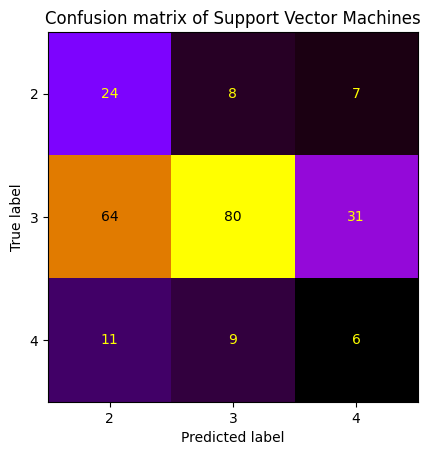

In [79]:
# Confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(svm_model, x_test, y_test, colorbar= False, cmap= 'gnuplot')
plt.title('Confusion matrix of Support Vector Machines')
plt.grid(False)

In [80]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           2       0.24      0.62      0.35        39
           3       0.82      0.46      0.59       175
           4       0.14      0.23      0.17        26

    accuracy                           0.46       240
   macro avg       0.40      0.43      0.37       240
weighted avg       0.66      0.46      0.50       240



In [81]:
Base_svm_result= metrics_calculator(y_test, y_pred_svm, 'Base SVM')
Base_svm_result.style.background_gradient(cmap='gnuplot')

,Base SVM
Accuracy,0.458333
precision,0.401177
Recall,0.434432
F1-score,0.369163


In [82]:
# saving base support vector machine model as pkl file

import joblib
joblib.dump(svm_model,"trained_model_base_svm.pkl")

['trained_model_base_svm.pkl']

Tunning for Support Vector Machines

In [83]:
# model--> svm_model

# Defining search parameters
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter 
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf' kernel
}

# Defining search
from sklearn.model_selection import GridSearchCV
search= GridSearchCV(svm_model, param_grid, scoring= 'accuracy', n_jobs= -1, cv= 5)

# Executing search
GridSearchCV = search.fit(X_train_sm, y_train_sm)

# Setting the classifier to the best combination of parameters
svm_model_cv= GridSearchCV.best_estimator_

# Summarizing the result
print('Best Score: ', GridSearchCV.best_score_)
print('Best hyperparameters: ', GridSearchCV.best_params_)

Best Score:  0.8717070121604727
Best hyperparameters:  {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [84]:
# Training the tuned svm model
svm_model_cv.fit(X_train_sm, y_train_sm)

SVC(C=10, gamma='auto')

In [85]:
# prediction

y_pred_tuned_svm= svm_model_cv.predict(x_test)

In [86]:
# tuned model evaluation
# Accuracy score

print(f'Tuned SVM model accuracy score:\n {accuracy_score(y_test, y_pred_tuned_svm)}')

Tuned SVM model accuracy score:
 0.7125


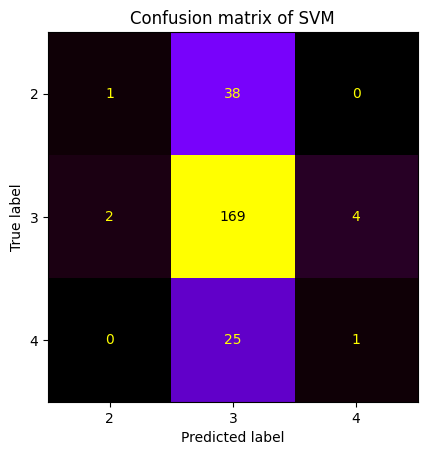

In [87]:
# Tuned model confusion matrix

ConfusionMatrixDisplay.from_estimator(svm_model_cv, x_test, y_test, colorbar= False, cmap= 'gnuplot')
plt.title('Confusion matrix of SVM')
plt.grid(False)

In [88]:
# tuned model classification report

print(classification_report(y_test, y_pred_tuned_svm))

              precision    recall  f1-score   support

           2       0.33      0.03      0.05        39
           3       0.73      0.97      0.83       175
           4       0.20      0.04      0.06        26

    accuracy                           0.71       240
   macro avg       0.42      0.34      0.31       240
weighted avg       0.61      0.71      0.62       240



In [89]:
# tuned model performance metrics

tuned_svm_result= metrics_calculator(y_test, y_pred_tuned_svm, 'Tuned SVM')
tuned_svm_result.style.background_gradient(cmap= 'gnuplot')

,Tuned SVM
Accuracy,0.712500
precision,0.420594
Recall,0.343272
F1-score,0.314201


In [90]:
# saving tuned svm model as pkl file

import joblib
joblib.dump(svm_model_cv,"trained_model_tuned_svm.pkl")

['trained_model_tuned_svm.pkl']

Tunned XG Boosting Model

In [91]:
# importing the model
import xgboost as xg

# label encoding the target variable to have values of 0, 1, 2 of performance rating to have easy model implementation
from sklearn.preprocessing import LabelEncoder
label_encoder_xgboost = LabelEncoder()
y_train_sm_encoded = label_encoder_xgboost.fit_transform(y_train_sm)

# creating xgboost classfier
xgboost= xg.XGBClassifier(objective= 'multi:softmax', learning_rate= 0.1)


# Defining a dictionary of hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.6, 0.8, 1],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5]
}

In [92]:
from sklearn.model_selection import GridSearchCV

search = GridSearchCV(estimator= xgboost, param_grid= param_grid, scoring= 'accuracy', n_jobs= -1, cv= 10)

# executing the search
GridSearchCV= search.fit(X_train_sm, y_train_sm_encoded)

In [93]:
# Setting the classifier to the best combination of parameters
xg_boost_model_cv= GridSearchCV.best_estimator_

# Summarizing the result
print('Best Score: ', GridSearchCV.best_score_)
print('Best hyperparameters:', GridSearchCV.best_params_)

Best Score:  0.9723513328776485
Best hyperparameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}


In [94]:
# training the tuned model

# fitting the extreme gradient boosting model on the training set
xg_boost_model_cv.fit(X_train_sm, y_train_sm_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [95]:
# prediction

y_pred_tuned_xgboost= xg_boost_model_cv.predict(x_test)

In [96]:
# model evaluation

# Encoding y_test data to have 0, 1, 2 orders of performance rating
y_test_encoded = label_encoder_xgboost.transform(y_test)

# accuracy score
a = accuracy_score(y_test_encoded, y_pred_tuned_xgboost)
print(f'Accuracy score of the XG boost model: {a}')

Accuracy score of the XG boost model: 0.9333333333333333


In [97]:
# cross validated score

from sklearn.model_selection import cross_val_score
cross_val_scores= cross_val_score(xg_boost_model_cv, X_train_sm, y_train_sm_encoded, cv= 10, scoring= 'accuracy')

print('Cross-validated score of the XG Boost Model:', cross_val_scores.mean())

Cross-validated score of the XG Boost Model: 0.9723513328776485


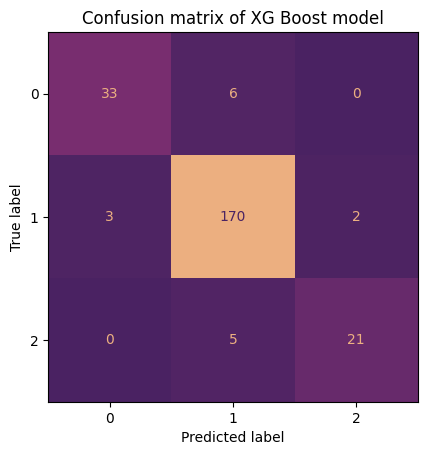

In [98]:
# Tuned model confusion matrix

ConfusionMatrixDisplay.from_estimator(xg_boost_model_cv, x_test, y_test_encoded, colorbar= False, cmap= 'flare_r')
plt.title('Confusion matrix of XG Boost model')
plt.grid(False)

In [99]:
# tuned model classification report

print(classification_report(y_test_encoded, y_pred_tuned_xgboost))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        39
           1       0.94      0.97      0.96       175
           2       0.91      0.81      0.86        26

    accuracy                           0.93       240
   macro avg       0.92      0.88      0.90       240
weighted avg       0.93      0.93      0.93       240



In [100]:
xg_boost_result= metrics_calculator(y_test_encoded, y_pred_tuned_xgboost, 'Tuned XGBoost')
xg_boost_result.style.background_gradient(cmap='flare_r')

,Tuned XGBoost
Accuracy,0.933333
precision,0.922979
Recall,0.875092
F1-score,0.897400


In [101]:
# saving tuned xg boost model as pkl file

import joblib
joblib.dump(xg_boost_model_cv,"xgboost_trained_and_tunned_model.pkl")

['xgboost_trained_and_tunned_model.pkl']